<a href="https://colab.research.google.com/github/andrerizzo/Image_Recognition_CNN/blob/master/Convolutional_Neural_Networks_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks Deep Dive


<br>

### What are Convolutional Neural Networks (CNNs) ?

Convolutional Neural Networks (CNNs) are a type of deep neural network designed to process data with a grid-like structure, such as images and time series. They use convolutional layers to automatically extract relevant features from the input data, reducing the need for manual preprocessing.


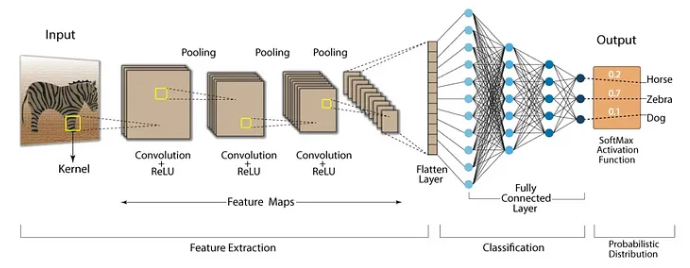
<figcaption>Source: https://medium.com/analytics-vidhya/convolution-operations-in-cnn-deep-learning-compter-vision-128906ece7d3</figcaption>

<br>

### What Are the Types of CNNs?  
There are several types of CNNs, each optimized for different applications. Some of the main ones include:

- **LeNet-5 (1998)** – One of the first CNNs, designed for handwritten digit recognition.  
- **AlexNet (2012)** – Popularized the use of deep networks with ReLU and dropout.  
- **VGGNet (2014)** – Uses deep convolutional layers with small filters (3x3).  
- **GoogLeNet/Inception (2014)** – Introduced Inception modules to capture different scales.  
- **ResNet (2015)** – Utilizes residual connections for extremely deep networks (50+ layers).  
- **YOLO (You Only Look Once - 2015)** – Optimized for real-time object detection.  
- **U-Net (2015)** – Used for medical image segmentation.
- **DenseNet (2017)** – Connects all convolutional layers to improve information flow.  
  

<br>

### CNNs Architecture    

1. **Convolutional Layers:**

- These layers apply convolutional operations to the input. But what is convolution ? It involves sliding a filter (or kernel) over the input data to extract features like edges, corners, or textures.    
- The output of this operation is called a feature map.  
- Convolution is the heart of the CNN, allowing that the network detects patterns in different image regions, making then ideal for image recognition.







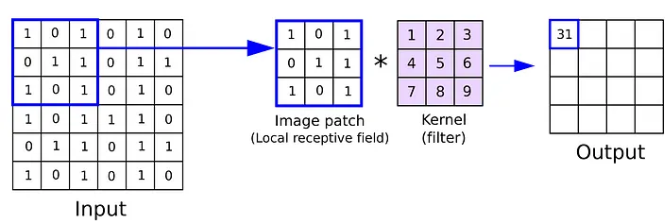
<figcaption>Source: https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243 </figcaption>

  
  - Key Parameters of convolutional layers:
    - *Kernel size:* Dimensions of the filter (e.g., 3x3 or 5x5).  
    - *Stride:* Stride determines how the filter convolves over the input matrix, i.e. how many pixels shift. When you set the stride to 1, the filter moves across one pixel at a time, and when you set the stride to 2, the filter moves across two pixels at a time. The smaller the stride value, the smaller the output, and vice versa (Kalita 2025).  
    - *Padding:* is the addition of extra pixel rows/columns around the borders of an input image. With padding, it is possible to mantain the image siza even after convolution.  

<br>

2. **Activation Function:**  

  Activation functions introduce non-linearity into CNNs, enabling them to learn complex patterns beyond simple linear transformations. Key roles include:

  - *Feature Extraction* – Helps CNNs detect hierarchical patterns from edges to objects.  
  - *Gradient Flow Control* – Prevents vanishing gradients (e.g., ReLU, Leaky ReLU).  
  - *Efficient Learning*  – Regulates information flow, improves computational efficiency, and reduces overfitting.


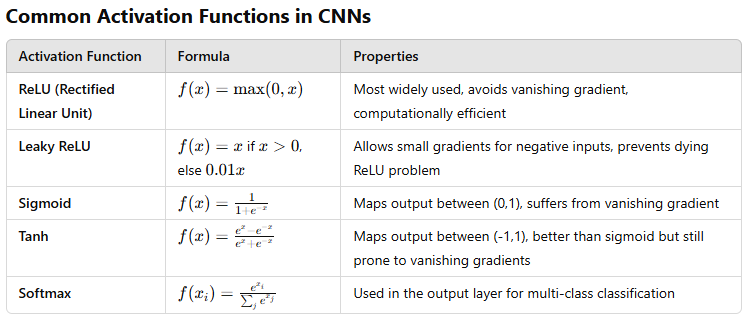

- **Choosing the Right Activation Function**  

  - **Hidden layers:**
    - *ReLU* (or its variants like Leaky ReLU) is usually the best choice due to efficiency and strong gradient flow.  
  - **Output layer:**   
    - *Sigmoid* for binary classification.  
    - *Softmax* for multi-class classification.  
    - *Linear* (no activation) for regression tasks.

<br>

3. **Pooling Layers:**  

  These layers reduce the spatial dimensions of the feature maps (e.g., height and width) while retaining important information.  

  Types:  
  Max pooling: Takes the maximum value in a pooling window (e.g., 2x2).  
  Average pooling: Takes the average value in a pooling window.  

  Benefits:  
  Reduces computational cost, controls overfitting, and retains essential features.  


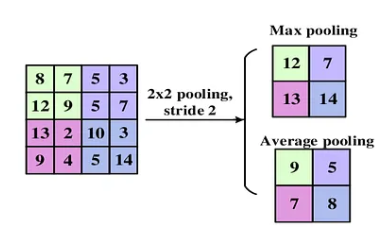
<figcaption>Source: https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243 </figcaption>

<br>

4. **Fully Connected Layers (Dense Layers):**  

  After feature extraction, the output is flattened and passed through one or more fully connected layers to make final predictions.  
  This layer combines features learned by the convolutional layers for classification or regression tasks.  
  
  How do they work ?  
  - **Flattening:** The outputs from convolutional and pooling layers are converted into a one-dimensional vector.  
  - **Fully Connected Neurons:** Each neuron is connected to every neuron in the previous layer, forming a dense network.  
  - **Probability Calculation:** Uses activation functions (such as Softmax or Sigmoid) to determine the final class of the image.  


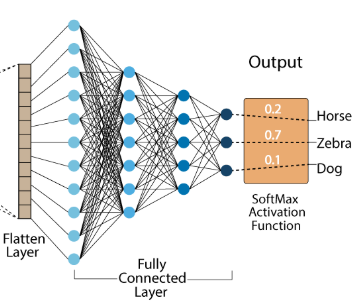
<figcaption>Source: https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/</figcaption>

<br>

5. **Dropout**

  Regularization technique to prevent overfitting by randomly setting a fraction of the layer’s neurons to zero during training.

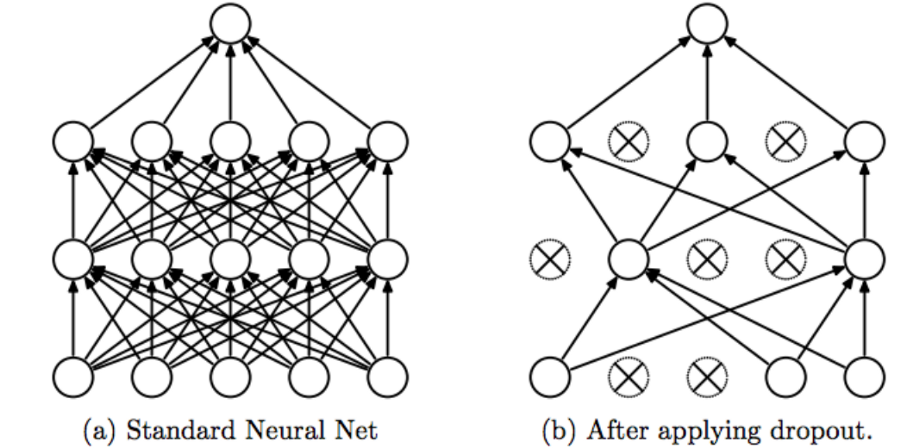  
<figcaption>Source: https://colab.research.google.com/drive/1-PrZ4ogfd_-wyhEcwaO1E0MdkKDYsBbN?authuser=1#scrollTo=i3HbvhX-8dJ5</figcaption>  

<br>

### RGB color schema
To understand what will be done, let's delve into the RGB color scheme.  

The RGB (Red, Green, Blue) standard is an additive model used to represent colors by combining three primary colors: red, green, and blue. It is widely used in digital displays, such as monitors, televisions, and cameras, because these devices emit light to create colors.  

#### Color Representation in RGB  
In the RGB model, each color is represented by three values corresponding to the intensity of red, green, and blue.  
These values range from 0 to 255 for each color.
Example:  
* RGB(255, 0, 0) - Pure or 100% red  
* RGB(0, 255, 0) - Pure or 100% green  
* RGB(0, 0, 255) - Pure or 100% blue  

But it is possible to have also combination os two or more colors to form a third one.  
Example:  
* RGB(255, 255, 255): Pure or 100% white
* RGB(0, 0, 0): Black
* RGB(128, 128, 0): Half red and half green that is light yellow.  

<br>

---   


## Practical Problem

### Load required libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#from keras.preprocessing import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.applications import VGG16, ResNet50
from keras.datasets import cifar10

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import cv2

import albumentations as albu

from skimage.transform import resize

from pylab import rcParams

from sklearn.model_selection import train_test_split

from google.colab import files

### Load Dataset

In [114]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Data Analysis

#### Analyse dataset shape

In [30]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


Which means 50000 images for training with 32 pixels x 32 pixels x 3 colors (RGB) and 10000 images for test.  

#### Analyse data structures

In [31]:
print('X_train:', type(X_train))
print('y_train:', type(y_train))
print('X_test:', type(X_test))
print('y_test:', type(y_test))

X_train: <class 'numpy.ndarray'>
y_train: <class 'numpy.ndarray'>
X_test: <class 'numpy.ndarray'>
y_test: <class 'numpy.ndarray'>


#### Analyse data types

In [32]:
print('X_train object type: ', X_train.dtype)
print('X_test object type: ', X_test.dtype)

X_train object type:  uint8
X_test object type:  uint8


#### Analyse if the training and test datasets are imbalanced

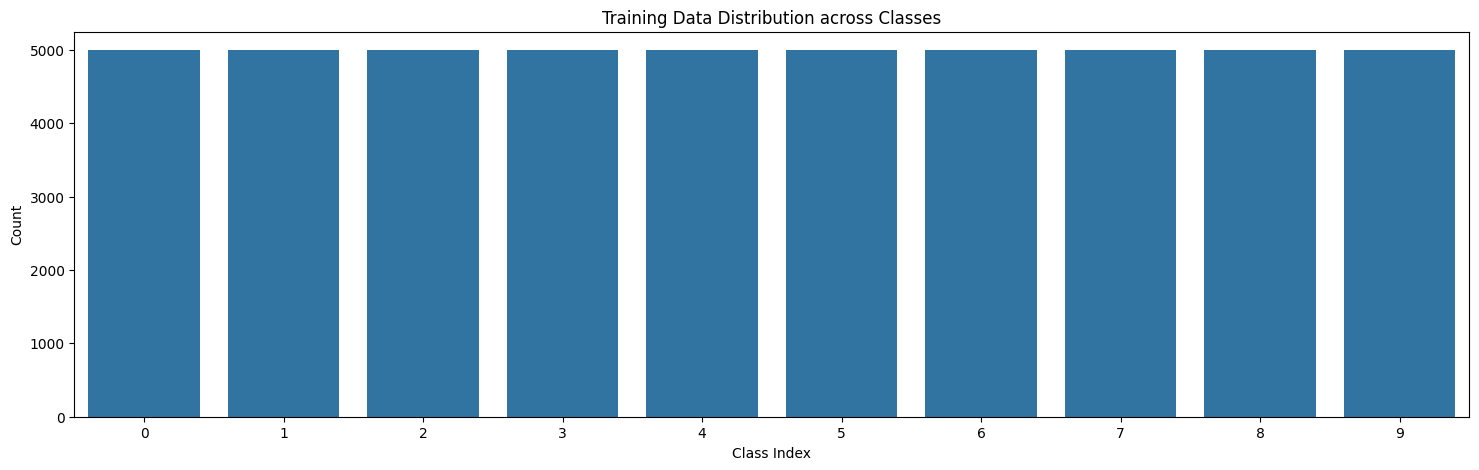

In [35]:
# Convert labels into a Pandas DataFrame
df_train = pd.DataFrame(y_train, columns=['label'])

# Count occurrences of each label
train_counts = df_train['label'].value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(18, 5))
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.title("Training Data Distribution across Classes")
plt.show()

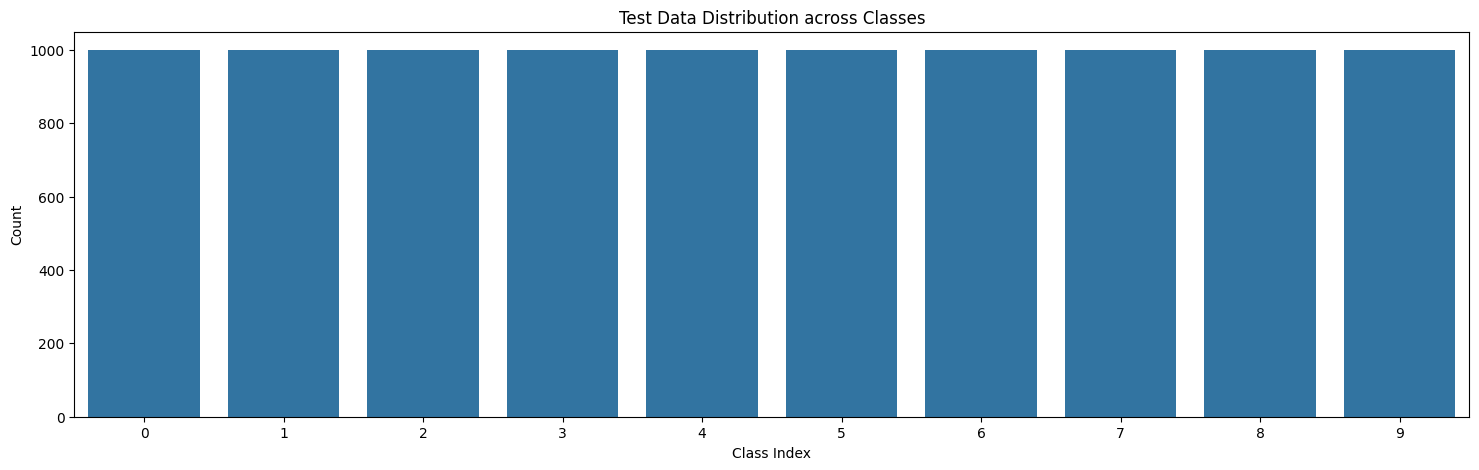

In [36]:
# Convert labels into a Pandas DataFrame
df_test = pd.DataFrame(y_test, columns=['label'])

# Count occurrences of each label
test_counts = df_test['label'].value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(18, 5))
sns.barplot(x=test_counts.index, y=test_counts.values)
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.title("Test Data Distribution across Classes")
plt.show()

#### **Dataset Analysis**  

- X_train
  - 50000 images distributed between 100 classes each one with 500 pictures.  
  - NumPy array data structure with integer data type.
  - There is no class imbalance.  
  - **Actions:**   
    - Reshape to a 4D tensor(50000, 32, 32, 3) to be used by Keras.  
    - Convert the 4D tensor data type to float32.  

- X_test
  - 10000 images distributed between 100 classes each one with 100 pictures.  
  - NumPy array data structure with integer data type.
  - There is no class imbalance.
  - **Actions:**  
    - Reshape to a 4D tensor(50000, 32, 32, 3) to be used by Keras.  
    - Convert the 4D tensor data type to float32.

- y_train
  - 50000 labels distributed between 100 classes each one with 500 labels.  
  - List data structure with integer data type.    
  - **Action:**  
    - Convert the list data structure to a NumPy array to be used by Keras.

- y_test
  - 10000 labels distributed between 100 classes each one with 100 labels.  
  - List data structure with integer data type.    
  - **Action:**  
    - Convert the list data structure to a NumPy array to be used by Keras.

---  

<br>

### Pre-processing



#### Convert X_train and X_test from a *Numpy array* to a *4D tensor* and transform data type from *int* to *float*



In [115]:
X_train = X_train.reshape(50000, 32, 32, 3).astype('float32')
X_test = X_test.reshape(10000, 32, 32, 3).astype('float32')

#### Data Normalization

In [116]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Create train and validation sets  

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Save labels for future use

In [118]:
y_train_decimal = y_train
y_test_decimal = y_test

#### Convert y_train and y_test to One-hot Encoding format

In [119]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#### Assign text labels

In [120]:
y_train_label = []
y_test_label = []

label_map = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

y_train_label = [label_map[label[0]] for label in y_train_decimal]

#### View 30 Random Images

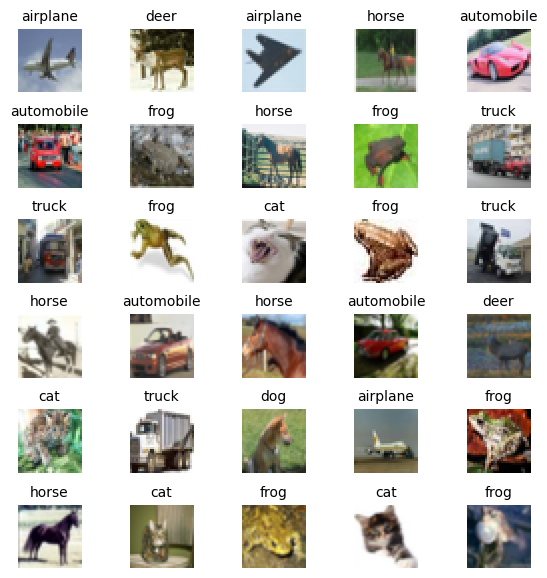

In [121]:
rcParams = 7,7
for i in range(30):
  image_num = np.random.randint(0, len(X_train))
  plt.subplot(6, 5, i+1)
  plt.grid(False)
  plt.axis('off')
  plt.imshow(X_train[image_num])
  plt.title(y_train_label[image_num], fontsize=10)
  plt.subplots_adjust(hspace=0.5)

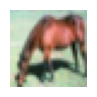

Image number: 12432
Image label (numeric): 7
Image label (text): horse


In [125]:
fig = np.random.randint(0, len(y_train_decimal))
plt.figure(figsize=(1, 1))
plt.imshow(X_train[fig])
plt.axis('off')
plt.show()
print(f'Image number: {fig}')
print(f'Image label (numeric): {y_train_decimal[fig][0]}')
print(f'Image label (text): {y_train_label[fig]}')


#### Analyse dataset after feature engineering

In [123]:
print('X_train data structure: ', type(X_train))
print('X_train data type: ', X_train.dtype)
print('X_train shape: ', X_train.shape)

print('\ny_train data structure: ', type(y_train))
print('y_train data type: ', y_train.dtype)
print('y_train shape: ', y_train.shape)

print('\nX_val data structure: ', type(X_val))
print('X_val data type: ', X_val.dtype)
print('X_val shape: ', X_val.shape)

print('\ny_val data structure: ', type(y_val))
print('y_val data type: ', y_val.dtype)
print('y_val shape: ', y_val.shape)

print('\nX_test data structure: ', type(X_test))
print('X_test data type: ', X_test.dtype)
print('X_test shape: ', X_test.shape)

print('\ny_test data structure: ', type(y_test))
print('y_test data type: ', y_test.dtype)
print('y_test shape: ', y_test.shape)


X_train data structure:  <class 'numpy.ndarray'>
X_train data type:  float32
X_train shape:  (40000, 32, 32, 3)

y_train data structure:  <class 'numpy.ndarray'>
y_train data type:  float64
y_train shape:  (40000, 10)

X_val data structure:  <class 'numpy.ndarray'>
X_val data type:  float32
X_val shape:  (10000, 32, 32, 3)

y_val data structure:  <class 'numpy.ndarray'>
y_val data type:  float64
y_val shape:  (10000, 10)

X_test data structure:  <class 'numpy.ndarray'>
X_test data type:  float32
X_test shape:  (10000, 32, 32, 3)

y_test data structure:  <class 'numpy.ndarray'>
y_test data type:  float64
y_test shape:  (10000, 10)


---

<br>


#### Auxiliary Tools  
After all data ingestion and preprocessing, we got a deep knowledge about all changes that must be made before we can use the dataset.  

That's why now I will create some functions to improve the modeling steps.

In [4]:
class dataset():
  def __init__(self):
    pass

  def get_data(self):
    # DATA OUTPUT MUST BE X_train, y_train, X_test, y_test
    (self.X_train_raw, self.y_train_raw), (self.X_test_raw, self.y_test_raw) = cifar10.load_data()
    print('Dataset downloaded\n')
    return self.X_train_raw, self.y_train_raw, self.X_test_raw, self.y_test_raw


  def preprocessing(self):
    self.get_data()
    self.X_train = (self.X_train_raw.reshape(50000, 32, 32, 3).astype('float32')) / 255.0
    self.X_test = (self.X_test_raw.reshape(10000, 32, 32, 3).astype('float32')) / 255.0
    self.y_train = to_categorical(self.y_train_raw)
    self.y_test = to_categorical(self.y_test_raw)
    self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.2, random_state=42)
    print('Dataset preprocessed\n')
    return self.X_train, self.y_train, self.X_val, self.y_val, self.X_test, self.y_test
    # DATA OUTPUT MUST BE X_train, y_train, X_val, y_val, X_test, y_test

In [5]:
class model_assessment():
  def __init__(self, history):
    self.history = history


  def numerical_analysis(self):
    best_epoch = min(range(len(self.history.history['val_loss'])), key=lambda i: self.history.history['val_loss'][i])
    print('\n\nNumerical Analysis')
    print(f"Best epoch: {best_epoch+1}")
    print(f"Train Loss: {self.history.history['loss'][best_epoch]:.4f}")
    print(f"Validation Loss: {self.history.history['val_loss'][best_epoch]:.4f}")
    print(f"Train Accuracy: {self.history.history['accuracy'][best_epoch]:.4f}")
    print(f"Validation Accuracy: {self.history.history['val_accuracy'][best_epoch]:.4f}")
    print('\n\n')


  def graphical_analysis(self):
    acc = self.history.history['accuracy']
    val_acc = self.history.history['val_accuracy']
    loss = self.history.history['loss']
    val_loss = self.history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.title('Training and validation accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.xlabel('epoch')
    plt.legend(['trn_accuracy', 'val_accuracy'], loc='lower right')
    plt.show()

    plt.figure

    plt.title('Training and validation loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.xlabel('epoch')
    plt.legend(['trn_loss', 'val_loss'], loc='upper right')
    plt.show()

---

<br>

### Model 1: Creating a CNN from scratch

Dataset downloaded

Dataset preprocessed


Model Summary


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)


Model Training
Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1028 - loss: 2.3047 - val_accuracy: 0.1414 - val_loss: 2.2895 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1403 - loss: 2.2868 - val_accuracy: 0.2044 - val_loss: 2.2710 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1772 - loss: 2.2644 - val_accuracy: 0.2303 - val_loss: 2.2259 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2091 - loss: 2.2102 - val_accuracy: 0.2713 - val_loss: 2.1265 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2368 - loss: 2.1095 - val_accuracy: 0.2931 - val_loss: 2.0127 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2602 - loss: 2.0238 - val_accuracy: 0.3138 - val_loss: 1.9534 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/ste

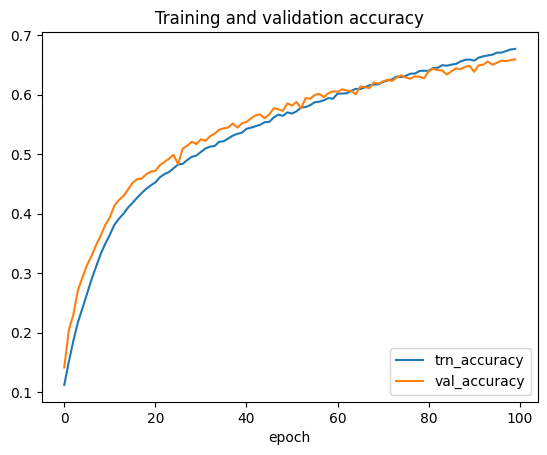

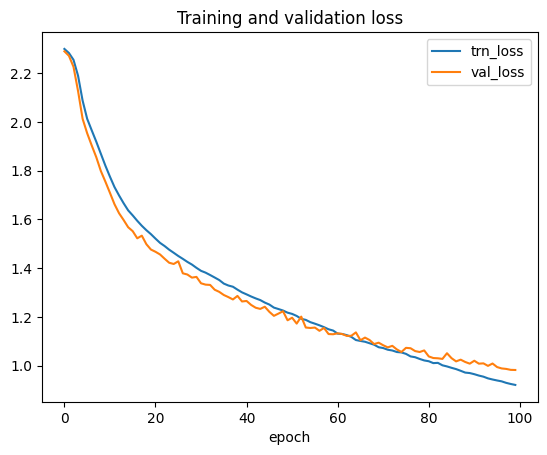

In [13]:
epochs = 100

# Load and preprocess dataset
X_train, y_train, X_val, y_val, X_test, y_test = dataset().preprocessing()

# Define model
inputs = keras.Input(shape=(32, 32, 3))

cl1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
cl1 = MaxPooling2D((2, 2))(cl1)

cl2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(cl1)
cl2 = MaxPooling2D((2, 2))(cl2)

cl3 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(cl2)
cl3 = MaxPooling2D((2, 2))(cl3)

flatten = Flatten()(cl3)
dl1 = Dense(units=128, activation='relu')(flatten)
dl1 = Dropout(0.3)(dl1)

outputs = Dense(units=10, activation='softmax')(dl1)

model1 = keras.Model(inputs=inputs, outputs=outputs)

# Compile model
optimizer = SGD(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=10,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=5,
                      min_lr = 1e-6, verbose=1),
    ModelCheckpoint(filepath='Model_1.keras', monitor='val_loss',
                                    save_best_only=True)
    ]

# Print model summary
print('\nModel Summary')
model1.summary()

# Model training
print('\nModel Training')
history_model1 = model1.fit( X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)

# Model assessment
print('\n')
model_assessment(history_model1).numerical_analysis()
model_assessment(history_model1).graphical_analysis()

---

<br>

### Model 2 - Create a CNN from Scratch with Data Augmentation

Dataset downloaded

Dataset preprocessed


Model Summary


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,812 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Model Training
Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1125 - loss: 2.2992 - val_accuracy: 0.1552 - val_loss: 2.2735 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1535 - loss: 2.2716 - val_accuracy: 0.1952 - val_loss: 2.2321 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1836 - loss: 2.2269 - val_accuracy: 0.2301 - val_loss: 2.1581 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2152 - loss: 2.1539 - val_accuracy: 0.2687 - val_loss: 2.0637 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2385 - loss: 2.0761 - val_accuracy: 0.2794 - val_loss: 2.0033 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2612 - loss: 2.0310 - val_accuracy: 0.2913 - val_loss: 1.9674 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/s

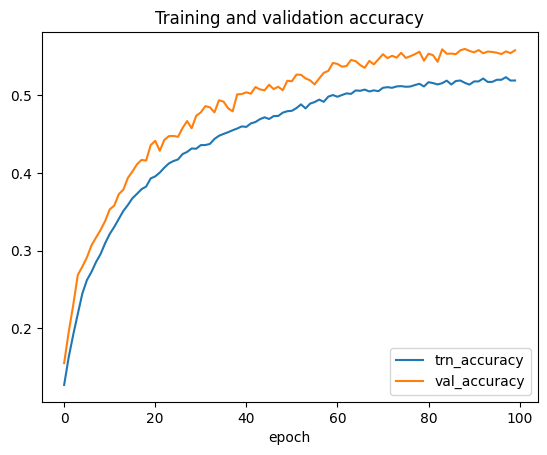

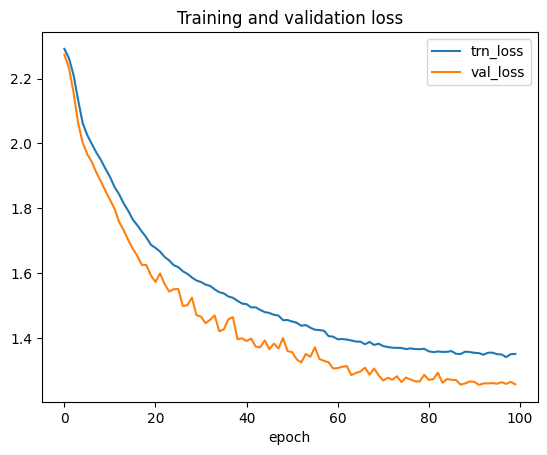

In [14]:
epochs = 100

# Load and preprocess dataset
X_train, y_train, X_val, y_val, X_test, y_test = dataset().preprocessing()

# Data Augmentation
data_augmentation = keras.Sequential([
  RandomFlip("horizontal"),
  RandomRotation(0.1),
  RandomZoom(0.1),
  RandomContrast(0.1)
])

# Define model
inputs = keras.Input(shape=(32, 32, 3))

da = data_augmentation(inputs)

cl1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(da)
cl1 = MaxPooling2D((2, 2))(cl1)

cl2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(cl1)
cl2 = MaxPooling2D((2, 2))(cl2)

cl3 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(cl2)
cl3 = MaxPooling2D((2, 2))(cl3)

flatten = Flatten()(cl3)
dl1 = Dense(units=128, activation='relu')(flatten)
dl1 = Dropout(0.3)(dl1)

outputs = Dense(units=10, activation='softmax')(dl1)

model2 = keras.Model(inputs=inputs, outputs=outputs)

# Compile model
optimizer = SGD(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=10,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=5,
                      min_lr = 1e-6, verbose=1),
    ModelCheckpoint(filepath='Model_2.keras', monitor='val_loss',
                                    save_best_only=True)
    ]

# Print model summary
print('\nModel Summary')
model1.summary()

# Model training
print('\nModel Training')
history_model2 = model2.fit( X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)

# Model assessment
print('\n')
model_assessment(history_model2).numerical_analysis()
model_assessment(history_model2).graphical_analysis()

### Data Augmentation

#### **What is Data Augmentation ?**  

Data augmentation is a machine learning technique used to artificially expand the size and diversity of a dataset by applying transformations to existing data. These transformations help improve model generalization by preventing overfitting and making the model more robust to variations in real-world data.  

Data augmentation is widely used in deep learning, especially in domains where data collection is expensive or time-consuming, such as computer vision and natural language processing (NLP).  

<br>



#### **When is Data Augmentation Used ?**    

- **Limited Data Availability** – Collecting and labeling large datasets is costly. Augmentation helps increase dataset size without additional data collection.  

- **Overfitting Prevention** – Models trained on small datasets tend to memorize training examples. Augmentation introduces variations that help generalization.  

- **Robustness to Real-World Variations** – Real-world data has noise, distortions, and transformations. Augmented data helps the model learn to handle such variations.  

- **Class Imbalance Handling** – In classification tasks, augmentation can generate synthetic samples for underrepresented classes.  

#### Data Augmentation function

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.10),
])

#### Model creation

In [ ]:
model_after_augmentation = keras.Sequential([
  layers.Input(shape=(32, 32, 3)),

  # Data Augmentation
  data_augmentation,

  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid',
                kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),
  layers.Dense(units=64, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(units=100, activation='softmax')
])

model_after_augmentation.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,580 (517.89 KB)

 Trainable params: 132,580 (517.89 KB)

 Non-trainable params: 0 (0.00 B)

#### Model compilation

In [ ]:
model_after_augmentation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Define Callbacks

In [ ]:
training_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss',
                                    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                      patience=3, min_lr = 0.0001)
    ]

#### Model training

In [ ]:
history = model_after_augmentation.fit(X_train, y_train,
                                       epochs=100,
                                       validation_data=(X_val, y_val),
                                       callbacks=training_callbacks)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0243 - loss: 4.4818 - val_accuracy: 0.0709 - val_loss: 4.0194 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0714 - loss: 4.0455 - val_accuracy: 0.1186 - val_loss: 3.7978 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1028 - loss: 3.8881 - val_accuracy: 0.1320 - val_loss: 3.7031 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1215 - loss: 3.7818 - val_accuracy: 0.1588 - val_loss: 3.5658 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1362 - loss: 3.7090 - val_accuracy: 0.1739 - val_loss: 3.4632 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1431 - loss: 3.6443 - val_accuracy: 0.1838 - val_loss: 3.4370 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.

KeyboardInterrupt: 

#### Numerical analysis

In [ ]:
numerical_analysis(history)

#### Graphical analysis

In [ ]:
graphical_analysis(history)

#### Conclusion  

**Before data augmentation**, the model achieved a **validation loss of 2.6612** with a **validation accuracy of 0.3534**.  

**After data augmentation**, the model achieved a **validation loss of 2.5985** with a **validation accuracy of 0.3580**.  

Although data augmentation led to a slight improvement, the overall performance remained poor. So, aditional improvements will be necessary.  

A natural choice would be to use CNN models such as VGG16 and ResNet through Transfer Learning.



---

<br>

### Transfer Learning Using VGG16 Model

#### **What is Transfer Learning ?**  

Transfer learning is a machine learning technique where a model trained on one task is repurposed for another related task. Instead of training a model from scratch, knowledge gained from solving one problem is transferred to another, usually requiring less data and computational resources.  

It is particularly useful in deep learning, where large neural networks need vast amounts of data and computation. By leveraging pre-trained models, transfer learning allows for efficient learning and improved performance in tasks with limited data.  

Examples of pre-trained models:  
- Images: VGG16, ResNet, MobileNet, EfficientNet  
- Text: BERT, GPT, T5  
- Speech: Wav2Vec, DeepSpeech  

<br>




#### **When Transfer Learning is Used ?**  

- **Limited Data Availability** – Training deep learning models from scratch requires extensive labeled data. Transfer learning helps in scenarios with small datasets.  

- **Computational Constraints** – Training large models from scratch is expensive and time-consuming. Using a pre-trained model saves significant time and resources.  

- **Domain Similarity** – When a new task is related to a previously solved task, a model trained for one domain can be adapted to another (e.g., using ImageNet-trained models for medical image classification).  

- **Improved Performance** – Often, models trained on large-scale datasets generalize better when fine-tuned for specific tasks.  

<br>

In [ ]:
# Resize images
def resize_img(img, shape):
    return cv2.resize(img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)

#### Import VGG16 model

In [ ]:
vgg16_model = applications.VGG16(weights='imagenet', include_top=False,
                                          input_shape=(32, 32, 3))

vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

#### Freeze all convolutional layers

In [ ]:
for layer in vgg16_model.layers:
    layer.trainable = False

vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Create the New Classifier - Adding new dense layers

In [ ]:
dense = layers.Flatten()(vgg16_model.output)

dense = layers.Dense(units=512, activation='relu')(dense)
dense = layers.Dropout(0.2)(dense)

dense = layers.Dense(units=64, activation='relu')(dense)
dense = layers.Dropout(0.2)(dense)

dense = layers.Dense(units=100, activation='softmax')(dense)

#### Merge new classifier with the vgg model

In [ ]:
final_model_with_vgg16 = keras.Model(inputs=vgg16_model.input, outputs=dense)

final_model_with_vgg16.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,016,676 (57.28 MB)

 Trainable params: 301,988 (1.15 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Model compilation

In [ ]:
final_model_with_vgg16.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

final_model_with_vgg16.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,016,676 (57.28 MB)

 Trainable params: 301,988 (1.15 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Define Callbacks

In [ ]:
training_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    keras.callbacks.ModelCheckpoint(filepath='model_with_vgg16.keras', monitor='val_loss',
                                    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                      patience=3, min_lr = 0.0001)
    ]

#### Model Training

In [ ]:
history = final_model_with_vgg16.fit(X_train, y_train,
                                     batch_size=32,
                                     epochs=20,
                                     validation_data=(X_val, y_val),
                                     callbacks=training_callbacks)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0874 - loss: 4.0574 - val_accuracy: 0.2411 - val_loss: 3.1171 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2172 - loss: 3.1911 - val_accuracy: 0.2734 - val_loss: 2.9153 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2543 - loss: 2.9974 - val_accuracy: 0.3018 - val_loss: 2.8369 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2792 - loss: 2.8863 - val_accuracy: 0.3031 - val_loss: 2.7924 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2961 - loss: 2.7814 - val_accuracy: 0.3180 - val_loss: 2.7320 - learning_rate: 0.0010
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3088 - loss: 2.7174 - val_accuracy: 0.3221 - val_loss: 2.7050 - learning_rate: 0.0010
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3226 - 

#### Numerical Analysis

In [ ]:
numerical_analysis(history)

Best epoch: 15
Train Loss: 2.1355
Validation Loss: 2.5965
Train Accuracy: 0.4274
Validation Accuracy: 0.3595


#### Graphical Analysis

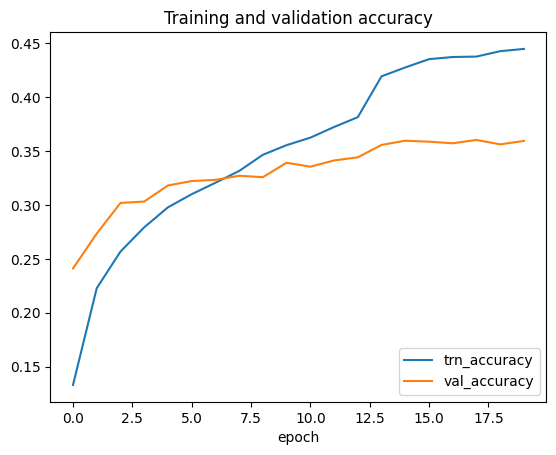

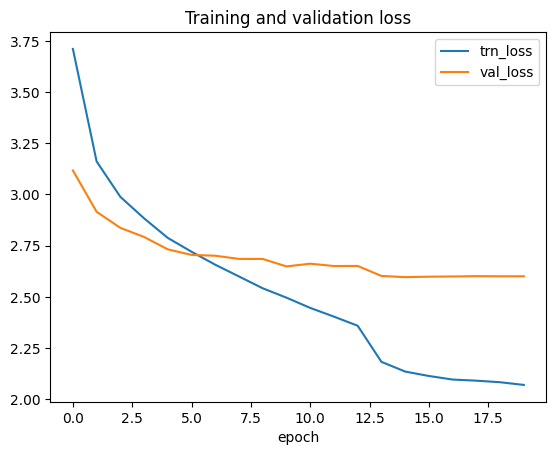

In [ ]:
graphical_analysis(history)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    'dataset_path',
    target_size=(224, 224),  # Resize 32x32 images to 224x224
    batch_size=32,
    class_mode='categorical'
)

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_path'